In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from kmeans_segmentation import k_means_segmentation
%matplotlib inline

from skimage.measure import label
from skimage.io import imread, imshow
from skimage.morphology import binary_closing
from scipy.ndimage.morphology import binary_fill_holes

In [2]:
path = "./Stereology/AISI4340-700C/"
im_name = path + "2015_09_10_700(10)_q015.tif"
mic = skimage.io.imread( im_name )
mic = mic[:-65, :]
mic_compressed = k_means_segmentation( mic, n_init = 10 )

 Results calculated...


(-0.5, 1279.5, 894.5, -0.5)

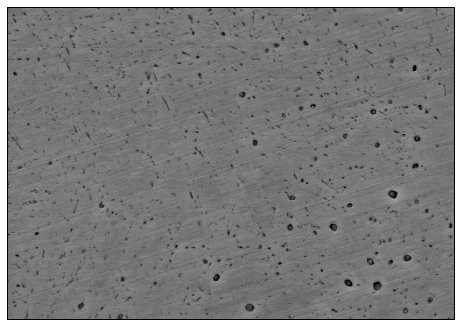

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mic, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

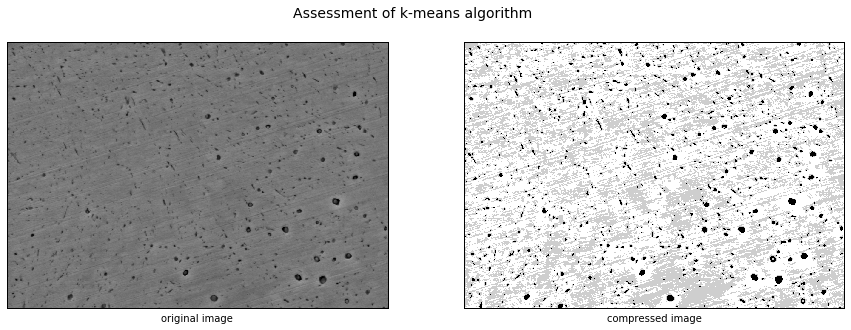

In [4]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(mic, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
ax.set_xlabel('original image')
ax.set_xticks([])
ax.set_yticks([])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(mic_compressed, cmap='gray', interpolation='nearest')
ax.set_xlabel('compressed image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')
fig.suptitle('Assessment of k-means algorithm', fontsize=14)

In [9]:
mic_blob = mic_compressed.copy()
mic_blob = np.where(mic_blob > 70, 0, 255)
# mic_blob[(mic_blob <= 68) & (mic_blob != 0) ] = 1

(-0.5, 1279.5, 894.5, -0.5)

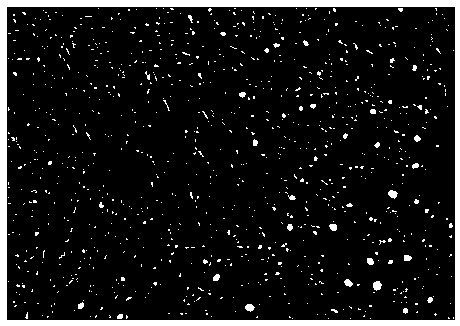

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(binary_fill_holes(mic_blob), cmap='gray', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

(-0.5, 1279.5, 894.5, -0.5)

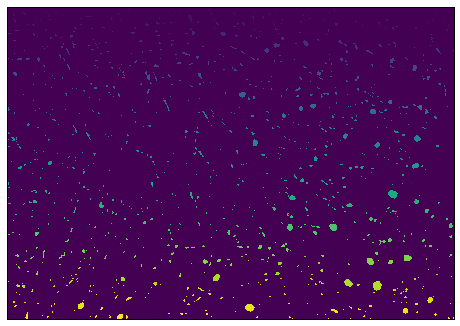

In [11]:
mic_lab = label(binary_fill_holes(mic_blob), background = -1)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mic_lab, cmap='viridis', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

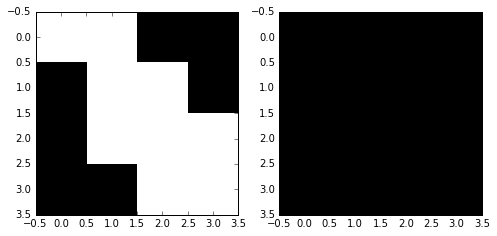

In [8]:
from scipy import ndimage
from skimage import feature, measure
loc = ndimage.find_objects(mic_lab)[601]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(mic_lab[loc], cmap='gray', interpolation='nearest')
contour = feature.canny(mic_lab[loc], sigma=300)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(contour, cmap='gray', interpolation='nearest')

In [12]:
import cv2

In [9]:
im = cv2.imread(im_name)

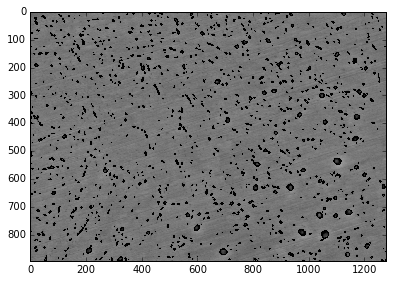

In [13]:
def binarize_particle(image):
    parts = image.copy()
    parts[parts == 1] = 0
    parts[parts > 1] = 255
    return np.array(parts, dtype=np.uint8)

blob = binarize_particle(mic_lab)
# print(blob)
im2, contours, hierarchy = cv2.findContours(blob, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
imshow(cv2.drawContours(mic, contours, -1, (0,255,0), 3), cmap='gray', interpolation='nearest')

(-0.5, 1279.5, 894.5, -0.5)

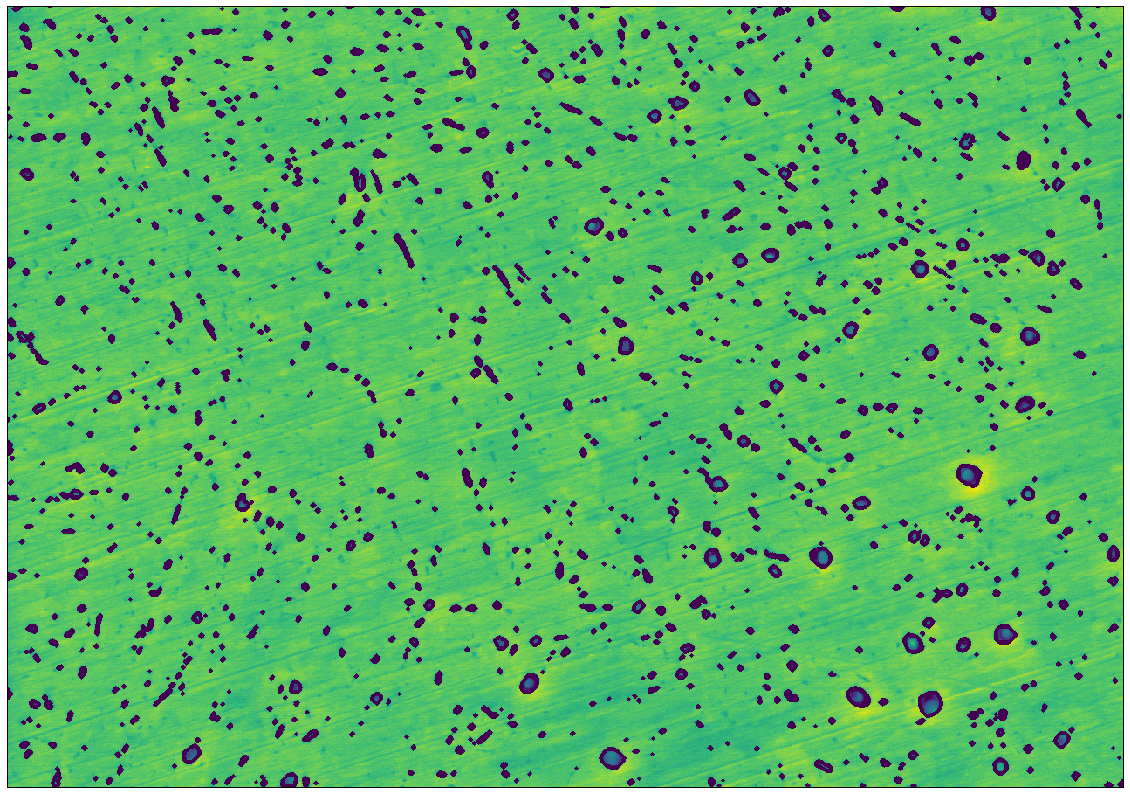

In [14]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(cv2.drawContours(mic, contours, -1, (0,255,0), 3), cmap='viridis', interpolation='nearest')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

 Results calculated...


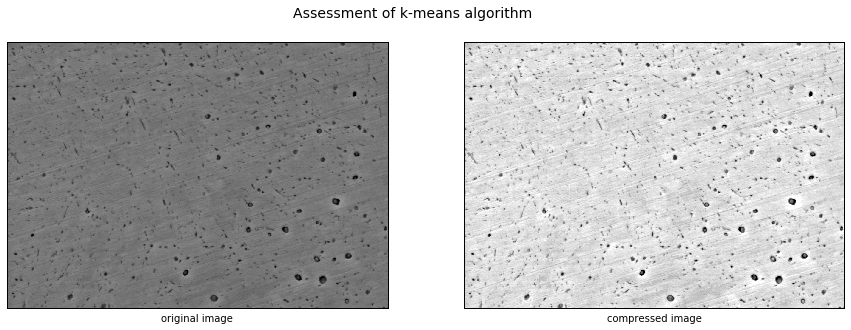

In [17]:
from sklearn import cluster

def compare_kmeans_results(original, compressed):
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(original, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
    ax.set_xlabel('original image')
    ax.set_xticks([])
    ax.set_yticks([])
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(compressed, cmap='gray', interpolation='nearest')
    ax.set_xlabel('compressed image')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('image')
    fig.suptitle('Assessment of k-means algorithm', fontsize=14)

def load_microstructure(im_name):
    mic = skimage.io.imread(im_name)
    return np.array(mic[:-65, :], dtype=np.uint8)

def k_means_segmentation(image, n_clusters=3, n_init=1):
    X = image.reshape((-1,1))
    k_means = cluster.KMeans(n_clusters=n_clusters, n_init=n_init)
    k_means.fit( X )
    print( " Results calculated..." )
    # get centroids values
    vals = k_means.cluster_centers_.squeeze()
    # get labels
    labs = k_means.labels_
    # attribute centroid values to calculated labels
    im_compressed = np.choose(labs, vals)
    im_compressed.shape = image.shape
    
    return np.array(im_compressed, dtype=np.uint8)

mic = load_microstructure(im_name)
mic_compressed = k_means_segmentation(mic, n_clusters=16, n_init=5)
compare_kmeans_results(mic, mic_compressed)

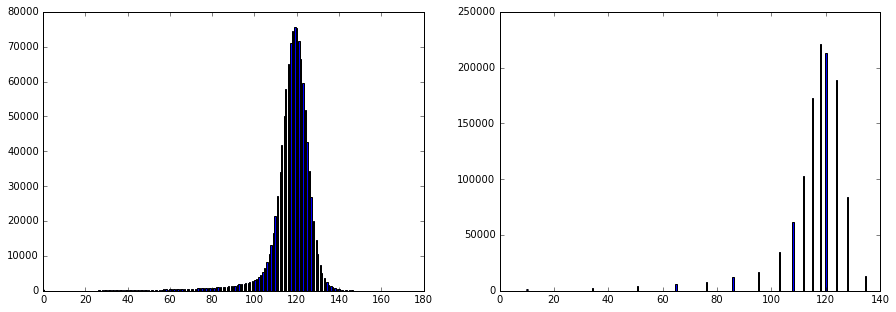

In [18]:
def compare_kmeans_results(original, compressed, cmap='gray', title='Assessment of k-means algorithm'):
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(original, cmap=cmap, interpolation='nearest', vmin=0, vmax=255)
    ax.set_xlabel('original image')
    ax.set_xticks([])
    ax.set_yticks([])
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(compressed, cmap=cmap, interpolation='nearest')
    ax.set_xlabel('compressed image')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('image')
    fig.suptitle(title, fontsize=14)
    return

# compare_kmeans_results(mic, mic_compressed, cmap='viridis')
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
sp1 = ax.hist(mic.ravel(), 256)
ax = fig.add_subplot(1, 2, 2)
sp2 = ax.hist(mic_compressed.ravel(), 256)

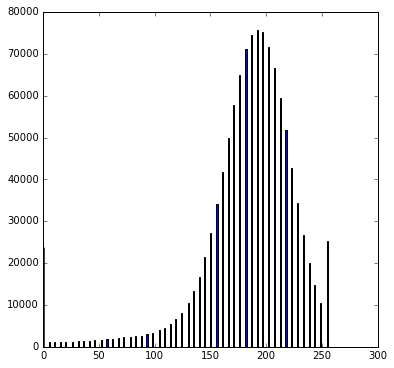

In [24]:
from skimage import exposure
from skimage.filters import rank
from skimage.morphology import disk

# Contrast stretching
p2, p98 = np.percentile(mic, (2, 98))
img_rescale = exposure.rescale_intensity(mic, in_range=(p2, p98))

# local equalization
#selem = disk(100)
#img_rescale = rank.equalize(mic, selem=selem)

#img_rescale = exposure.equalize_hist(mic)
#img_rescale = exposure.rescale_intensity(img_rescale, out_range=(0, 250))

#img_rescale = exposure.equalize_adapthist(mic)
#img_rescale = exposure.rescale_intensity(img_rescale, out_range=(0, 250))

# plot results
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
sp1 = ax.hist(img_rescale.ravel(), 256)

 Results calculated...


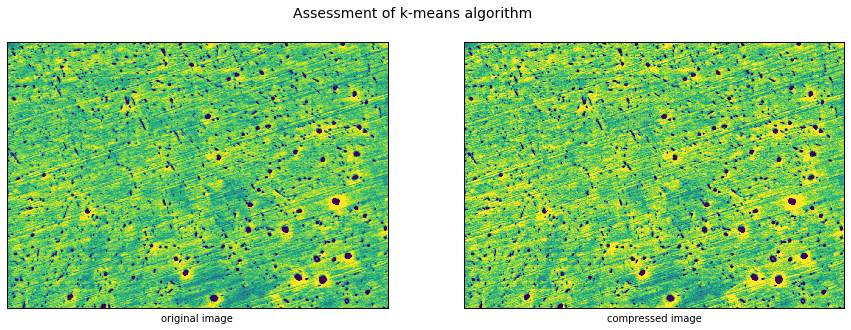

In [25]:
mic_compressed = k_means_segmentation(img_rescale, n_clusters=8, n_init=10)
compare_kmeans_results(img_rescale, mic_compressed, cmap='viridis')

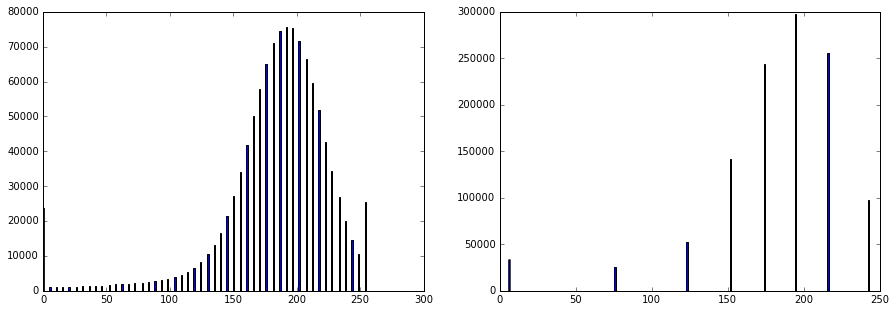

In [26]:
# Compare histograms
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)
sp1 = ax.hist(img_rescale.ravel(), 256)
ax = fig.add_subplot(1, 2, 2)
sp2 = ax.hist(mic_compressed.ravel(), 256)

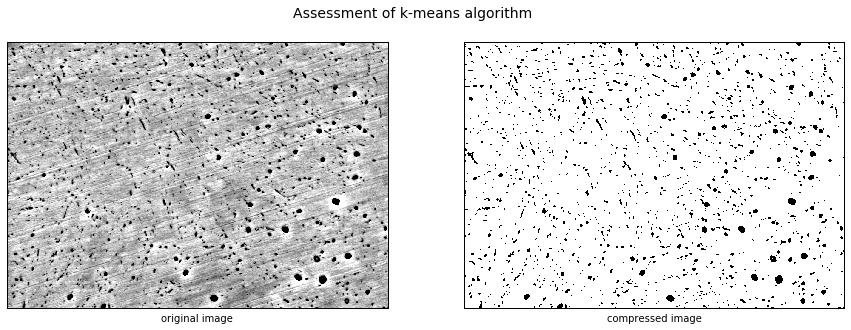

In [27]:
img_thr = mic_compressed.copy()
threshold = 100
img_thr[mic_compressed < threshold] = 0
img_thr[mic_compressed >= threshold] = 255
compare_kmeans_results(img_rescale, img_thr, cmap='gray')

In [58]:
from __future__ import division
from skimage.feature import greycomatrix, greycoprops

def joint_entropy_distribution(original, compressed):
    vals = np.unique(compressed)
    hist_mutual = np.zeros((256, vals.size))
    for i in np.unique(original):
        for j in range(vals.size):
            # print(i, j)
            hist_mutual[i, j] = np.sum((original == i) & (compressed == vals[j]))
    nonzero = hist_mutual > 0
    hist_mutual = hist_mutual / original.size
    joint_entropy = - np.sum(hist_mutual[nonzero] * np.log2(hist_mutual[nonzero]))
    return joint_entropy, np.array(hist_mutual)

def image_level_binning(image):
    levels = np.unique(image)
    for i in range(levels.size):
        image[image == levels[i]] = i
    return image, levels.size

def partition_quality(image):
    binned_img, levels = image_level_binning(image)
    # compute grey level colocation matrix on the binned image
    glcm = greycomatrix(binned_img, [1], [0], levels=levels, symmetric=False, normed=True)
    nonzero = glcm != 0
    p_ii = glcm.sum(axis=0)
    p_jj = glcm.sum(axis=1)
    corr = (glcm / p_ii / p_jj).ravel()
    mutual_information = np.sum(glcm[nonzero].ravel() * np.log2(corr[corr != 0]))
    entropy = - np.sum(glcm[nonzero].ravel() * np.log2(glcm[nonzero].ravel()))
    return mutual_information, entropy

mi, entropy = partition_quality(mic_compressed)
print("mutual information = {0}, entropy = {1}".format(mi, entropy))

mutual information = 0.981911582933, entropy = 4.236656614


In [31]:
def joint_entropy(original, compressed):
    comp_vals = np.unique(compressed)
    orig_vals = np.unique(original)
    hist_mutual = np.zeros((orig_vals.size, comp_vals.size))
    for i in range(orig_vals.size):
        for j in range(comp_vals.size):
            hist_mutual[i, j] = np.sum((original == orig_vals[i]) & (compressed == comp_vals[j]))
    nonzero = hist_mutual > 0
    hist_mutual = hist_mutual / original.size
    joint_entropy = - np.sum(hist_mutual[nonzero] * np.log2(hist_mutual[nonzero]))
    return joint_entropy

def marginal_entropy(image):
    im_hist = exposure.histogram(image)[0] / image.size
    nonzero = im_hist > 0
    entropy = - np.sum(im_hist[nonzero] * np.log2(im_hist[nonzero]))
    return entropy

def mutual_information(original, compressed):
    return marginal_entropy(original) + marginal_entropy(compressed) - joint_entropy(original, compressed)

orig_entropy = marginal_entropy(img_rescale)
compressed_entropy = marginal_entropy(mic)
mutual = mutual_information(img_rescale, mic)
print(orig_entropy, compressed_entropy, mutual)

(4.7767374867377432, 4.9661677183711914, 4.7767374867377432)


In [74]:
def batch_kmeans(image, n_clusters=3, n_rep=5):
    batch = []
    entropy = []
    mutual_info = []
    for i in range(n_rep):
        batch.append(k_means_segmentation(image, n_clusters=n_clusters, n_init=1))
        mi, s = partition_quality(batch[i].copy())
        print("mutual information = {0}, entropy = {1}".format(mi, s))
        entropy.append(s)
        mutual_info.append(mi)
    return batch, entropy, mutual_info

samples, entropy, mutual_info = batch_kmeans(img_rescale, n_clusters=5, n_rep=30)

 Results calculated...
mutual information = 0.825920650289, entropy = 3.41836557735
 Results calculated...
mutual information = 0.764178278506, entropy = 2.97868842149
 Results calculated...
mutual information = 0.77118197985, entropy = 3.00135817674
 Results calculated...
mutual information = 0.77118197985, entropy = 3.00135817674
 Results calculated...
mutual information = 0.755838196807, entropy = 2.95829363732
 Results calculated...
mutual information = 0.811029806796, entropy = 3.21606763802
 Results calculated...
mutual information = 0.798695823533, entropy = 3.14401543086
 Results calculated...
mutual information = 0.784095285856, entropy = 3.05294295896
 Results calculated...
mutual information = 0.828273054508, entropy = 3.36840463523
 Results calculated...
mutual information = 0.79318049501, entropy = 3.11226709812
 Results calculated...
mutual information = 0.799351177607, entropy = 3.21720184404
 Results calculated...
mutual information = 0.786770623389, entropy = 3.0904030

In [75]:
def batch_MI(batch):
    reference = batch[0]
    im = []
    for image in batch[1:]:
        im.append(mutual_information(reference, image))
    return im
s = np.array(entropy)
print(s.argmax(), s.argmin(), (np.abs(s - s.mean())).argmin())
print(entropy)

(0, 15, 9)
[3.4183655773512815, 2.9786884214857552, 3.0013581767393225, 3.0013581767393225, 2.9582936373189961, 3.2160676380181257, 3.1440154308623574, 3.052942958963953, 3.3684046352307071, 3.1122670981209453, 3.2172018440363752, 3.0904030422977038, 2.9786884214857552, 3.3572166481612706, 3.0801966305004504, 2.9295492624374253, 3.3380084218266397, 3.0801966305004504, 2.9993263844950993, 3.0720873067930574, 3.2160676380181257, 3.1736291045076213, 3.2909596348755392, 2.9295492624374253, 3.0013581767393225, 3.1215995586223104, 3.1215995586223104, 3.0013581767393225, 2.9993263844950993, 2.9295492624374253]


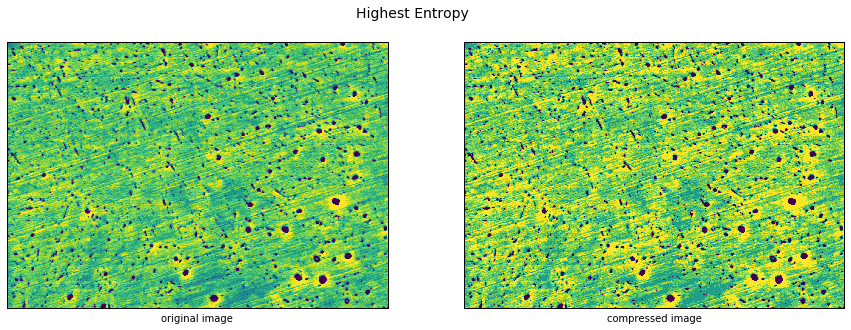

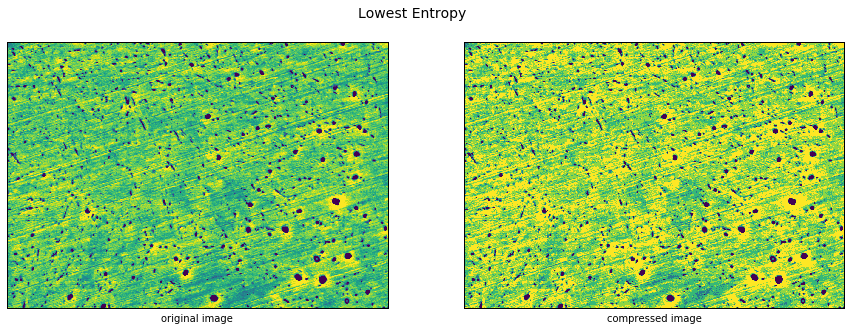

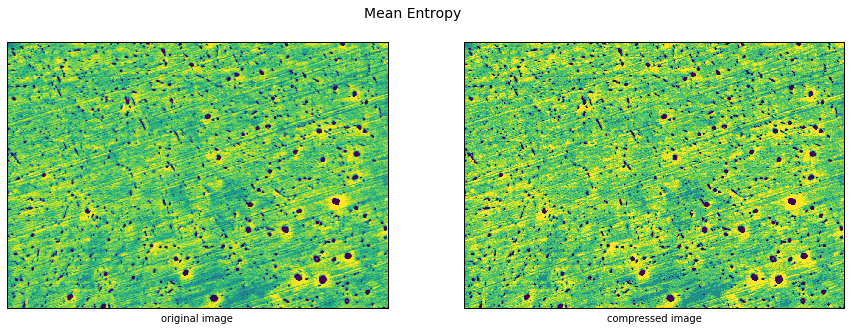

In [76]:
argmean = (np.abs(s - s.mean())).argmin()
compare_kmeans_results(img_rescale, samples[s.argmax()], cmap='viridis', title='Highest Entropy')
compare_kmeans_results(img_rescale, samples[s.argmin()], cmap='viridis', title='Lowest Entropy')
compare_kmeans_results(img_rescale, samples[argmean], cmap='viridis', title='Mean Entropy')

It seems that most of the entropy value is due to "granularity", or texture in the matrix. This assumption can be confirmed by plotting grey level histograms.

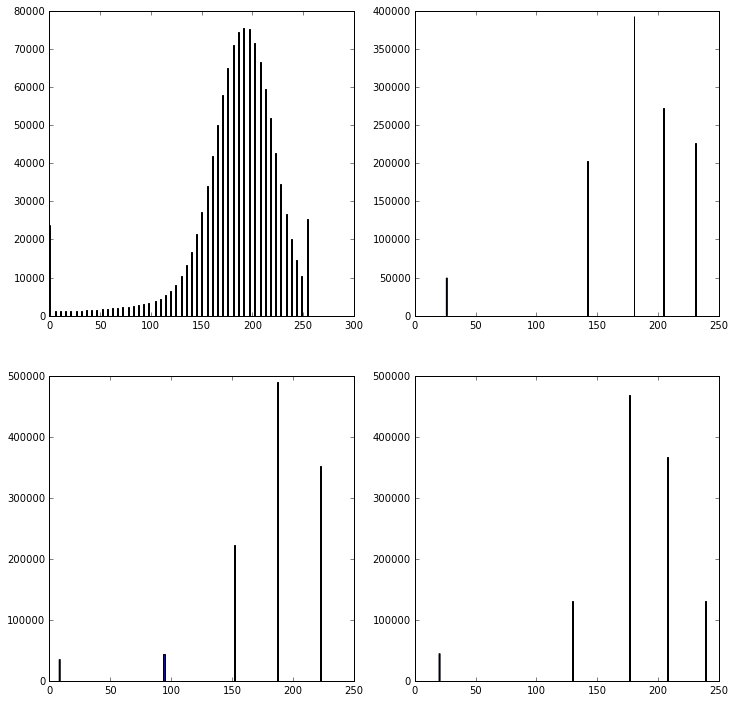

In [77]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(2, 2, 1)
sp1 = ax.hist(img_rescale.ravel(), 256)
ax = fig.add_subplot(2, 2, 2)
sp2 = ax.hist(samples[s.argmax()].ravel(), 256)
ax = fig.add_subplot(2, 2, 3)
sp3 = ax.hist(samples[s.argmin()].ravel(), 256)
ax = fig.add_subplot(2, 2, 4)
sp4 = ax.hist(samples[argmean].ravel(), 256)

The highest separation between the first cluster (dark pixels) and others is found for the sample with the highest entropy. The more the separation, the highest the number of dark pixels. Let's see now, what's the behavior with regards to the search for particles.

In [36]:
from skimage.morphology import rectangle
from skimage.filters import rank
from skimage.util.shape import view_as_windows

window_shape = (5,6)
# px_histograms = rank.windowed_histogram(img_rescale, selem, n_bins=256)
sub_view = view_as_windows(img_rescale, window_shape)
sub_view.shape

(891, 1275, 5, 6)

In [40]:
from skimage.feature import greycomatrix, greycoprops
patch = sub_view[0, 0, :, :]
glcm = greycomatrix(patch, [1], [0], 256, symmetric=True, normed=True)
diss = greycoprops(glcm, 'dissimilarity')[0, 0]
corr = greycoprops(glcm, 'correlation')[0, 0]
print(diss, corr)

(9.0800000000000001, 0.49153859038814951)


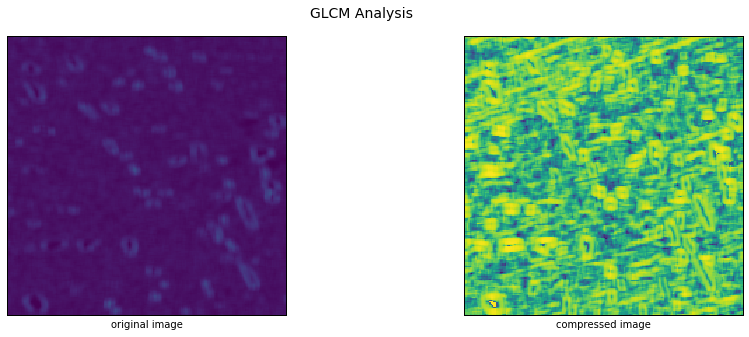

In [42]:
new_image = np.zeros((200, 200, 2))
for row_idx in range(new_image.shape[0]):
    for col_idx in range(new_image.shape[1]):
        patch = sub_view[row_idx, col_idx, :, :]
        glcm = greycomatrix(patch, [1], [0], 256, symmetric=True, normed=True)
        new_image[row_idx, col_idx, 0] = greycoprops(glcm, 'dissimilarity')[0, 0]
        new_image[row_idx, col_idx, 1] = greycoprops(glcm, 'correlation')[0, 0]

compare_kmeans_results(new_image[:,:,0], new_image[:,:,1], cmap='viridis', title='GLCM Analysis')

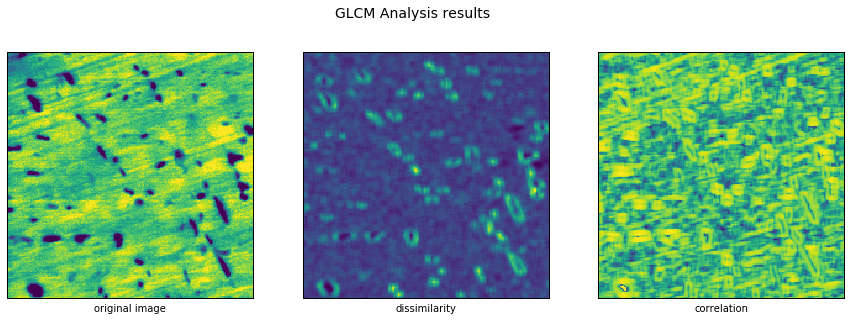

In [44]:
def plot_GLCM_results(original, glcm, cmap='gray', title='GLCM Analysis results'):
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(original, cmap=cmap, interpolation='nearest', vmin=0, vmax=255)
    ax.set_xlabel('original image')
    ax.set_xticks([])
    ax.set_yticks([])
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(glcm[:, :, 0], cmap=cmap, interpolation='nearest')
    ax.set_xlabel('dissimilarity')
    ax.set_xticks([])
    ax.set_yticks([])
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(glcm[:, :, 1], cmap=cmap, interpolation='nearest')
    ax.set_xlabel('correlation')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('image')
    fig.suptitle(title, fontsize=14)
    return

plot_GLCM_results(img_rescale[:200, :200], new_image, cmap='viridis')

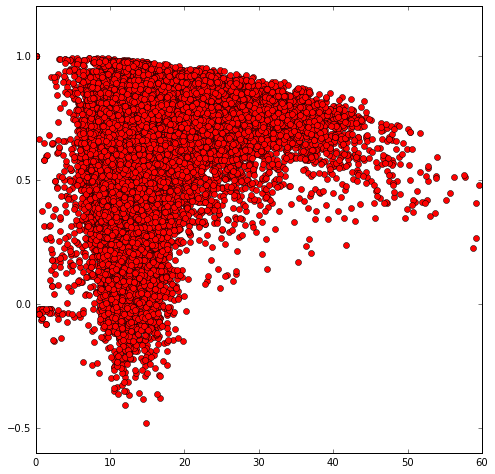

In [46]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
myfig = ax.plot(new_image[:, :, 0], new_image[:, :, 1], 'or')